# Predicting On-time Delivery of Online Purchases
## Part III-A: Modeling - Logistic Regression, X1, X2
## AAI-510 Team 7 Final Project

Team 7:  Ken Devoe, Tyler Foreman, Geoffrey Fadera

University of San Diego, Applied Artificial Intelligence

Date:  June 24, 2024

GitHub Repository: https://github.com/kdevoe/aai510-group7

## Import Common Functions

In [14]:
%run shipping_common_functions.ipynb

## Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

## Load Preprocessed Data

In [3]:
# train data
X_train = pd.read_csv('./data/x_train.csv')
y_train = np.ravel(pd.read_csv('./data/y_train.csv'))

# val data
X_val = pd.read_csv('./data/x_val.csv')
y_val = np.ravel(pd.read_csv('./data/y_val.csv'))

In [4]:
# Check imported data
print('TRAIN SET:')
print('   X_train:', X_train.shape)
print('   y_train:', y_train.shape)
print('\nVALIDATION SET:')
print('   X_val:', X_val.shape)
print('   y_val:', y_val.shape)

TRAIN SET:
   X_train: (8799, 17)
   y_train: (8799,)

VALIDATION SET:
   X_val: (1100, 17)
   y_val: (1100,)


In [5]:
X_train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,-0.925605,5,-0.670120,-0.378680,1,-0.392911,0.311901,0,0,0,0,1,0,0,1,1,0
1,1.697108,3,-0.173246,0.273631,2,-0.638968,0.532606,1,0,0,0,0,0,0,1,1,0
2,-1.799843,5,1.379486,-0.378680,2,-0.454426,-1.585178,0,0,0,1,0,0,0,1,0,1
3,0.822870,5,0.178707,-1.030992,2,-0.577454,0.406052,0,0,1,0,0,0,0,1,0,1
4,1.697108,3,1.772845,0.273631,1,-0.577454,-1.207352,0,0,1,0,0,1,0,0,1,0


In [6]:
X_val.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,-0.051367,2,1.213861,-1.030992,2,-0.700483,0.237314,0,0,0,1,0,0,1,0,1,0
1,-0.051367,2,-0.421683,-0.378680,2,-0.392911,0.697675,1,0,0,0,0,0,1,0,0,1
2,-0.051367,1,-0.297464,-1.030992,1,-0.638968,0.689116,0,0,0,1,0,0,0,1,0,1
3,-0.925605,3,-0.152543,-0.378680,2,-0.392911,0.826674,0,0,0,1,0,1,0,0,0,1
4,0.822870,5,0.779096,0.925943,2,-0.331397,-1.066126,1,0,0,0,0,1,0,0,0,1


## Model 1: Logistic Regression

A simple Logistic Regression is used to establish a baseline performance. 
Default parameter values are used.

### Model 1: Create, Train Model

In [7]:
# create model instance
model1 = []
model1 = LogisticRegression(solver='liblinear', random_state=0)

#fit the model using the training data
model1.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

### Model 1: Describe/Visualize Model

In [8]:
model1_featcoeff = pd.DataFrame({ 'features': model1.feature_names_in_,
                                  'coef' : np.ravel(model1.coef_)})

model1_featcoeff.set_index('features').sort_values('coef')

,coef
features,
Weight_in_gms,-0.380287
Customer_care_calls,-0.127812
Prior_purchases,-0.122080
Cost_of_the_Product,-0.109246
Product_importance,-0.096254
Customer_rating,0.022963
Warehouse_block_A,0.027294
Warehouse_block_D,0.091684
Warehouse_block_F,0.099142


Holding other features constant, **Discount_offered** contributes the most to timely arrival of shipments while **Weight_in_gms** contributes the most to late arrival. This is consistent with our EDA analysis (section 'General Correlation between Variables')

### Model 1: Performance on Validation Set

In [10]:
# predict y values based on the validation set
y_pred1 = model1.predict(X_val)

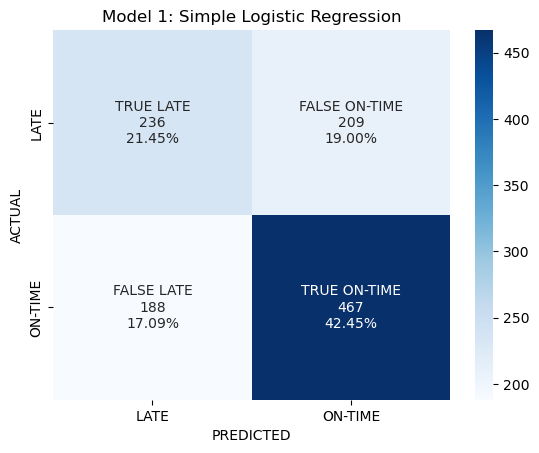

In [12]:
# generate confusion matrix for model1
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred1, title = 'Model 1: Simple Logistic Regression')

In [15]:
# Generate Classification Report for model 1
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred1, title = 'Model 1: Simple Logistic Regression')
    

              precision    recall  f1-score   support

        LATE       0.56      0.53      0.54       445
     ON-TIME       0.69      0.71      0.70       655

    accuracy                           0.64      1100
   macro avg       0.62      0.62      0.62      1100
weighted avg       0.64      0.64      0.64      1100

Model 1: Simple Logistic Regression


## Model 2: K Nearest Neighbor

....

### Model 2: Create, train, evaluate as many KNN models as there are K-values

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [17]:
k_values = list(range(1, 20))
acc_train = []
acc_val = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    y_pred_train = knn.predict(X_train)
    
    y_pred_val = knn.predict(X_val)
    
    acc_train.append(accuracy_score(y_train, y_pred_train))
    acc_val.append(accuracy_score(y_val, y_pred_val))

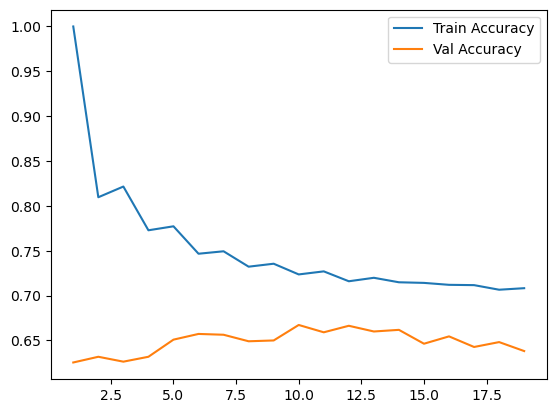

In [18]:
plt.plot(k_values, acc_train, label = 'Train Accuracy')
plt.plot(k_values, acc_val, label = 'Val Accuracy')
plt.legend()


In [19]:
# select k_value with highest Validation accuracy

k_best = acc_val.index(max(acc_val))
k_best

9

In [20]:
# select another k_value with least overfitting
delta = np.subtract(acc_train, acc_val)
k_best2 = delta.argmin()
k_best2

11

In [21]:
# generate kNN model (again) using n_neighbors that gave the highest validation accuraxy

model2 = KNeighborsClassifier(n_neighbors=k_best)
    
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

### Model 2: Performance on Validation Set

In [22]:
# predict y values based on the validation set
y_pred2 = model2.predict(X_val)
y_pred2

array([0, 0, 0, ..., 0, 0, 1])

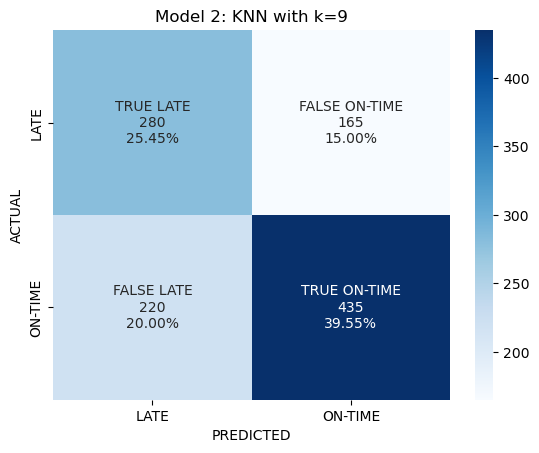

In [24]:
# generate confusion matrix for model2
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred2, title = 'Model 2: KNN with k=9')

In [25]:
# Generate Classification Report for model 2
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred2, title = 'Model 2: KNN with k=9')

              precision    recall  f1-score   support

        LATE       0.56      0.63      0.59       445
     ON-TIME       0.72      0.66      0.69       655

    accuracy                           0.65      1100
   macro avg       0.64      0.65      0.64      1100
weighted avg       0.66      0.65      0.65      1100

Model 2: KNN with k=9
